In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

#Locale settings
import locale
# Set to German locale to get comma decimal separater
locale.setlocale(locale.LC_NUMERIC, "de_DE")

plt.rcParams['text.usetex'] = True 
plt.rcParams.update({'font.size': 10,'font.family': 'serif'})
plt.rcParams['figure.figsize'] = (.75*6.5, .75*4.5)

plt.rcParams['axes.formatter.use_locale'] = True

plt.rcParams['text.latex.preamble'] = r'\usepackage{icomma}\usepackage{upgreek}'

<h3>3V +- 0.8 VPP!!!!!!!!!!!!!</h3>

In [2]:
dataCH2 = pd.read_csv('maliSignalData/3DC-0.8AC/data2.txt').values
print(type(dataCH2))

<class 'numpy.ndarray'>


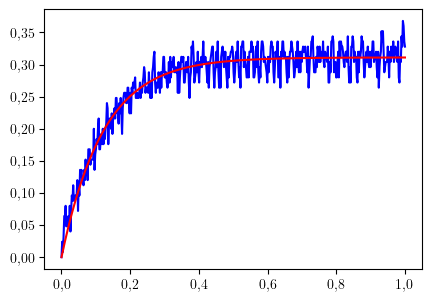

In [3]:
t = np.linspace(0,1,500)

def func(t, a, T):
    return a*(1-np.exp(-t/T))

y = dataCH2[690:1190]/10 - 3.65
x = t

y = np.ndarray.flatten(y) - -0.017999999999999794

merenje1 = y

popt, pcov = curve_fit(func,t,y)

plt.plot(t, y, 'b', label='arduino merenje')
plt.plot(t, func(t, *popt), 'r', label='model')

In [4]:
print('Km = ', popt[0], '[Hz]')
print('Tm = ', popt[1],'[s]')
print(y[0])

Km =  0.31109461249980364 [Hz]
Tm =  0.12196613017428891 [s]
0.0


In [5]:
dataCH2 = pd.read_csv('maliSignalData/3DC-1.6AC/CH2csvData').values

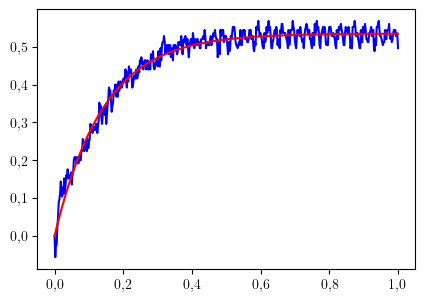

In [6]:
t = np.linspace(0,1,500)

def func(t, a, T):
    return a*(1-np.exp(-t/T))

y = dataCH2[600:1100]/10 - 3.5
x = t

merenje2 = y

y = np.ndarray.flatten(y) - 0.05200000000000049

popt, pcov = curve_fit(func,t,y)

plt.plot(t, y, 'b', label='arduino merenje')
plt.plot(t, func(t, *popt), 'r', label='model')

In [7]:
print('Km = ', popt[0], '[Hz]')
print('Tm = ', popt[1],'[s]')
print(y[0])

Km =  0.534683378312091 [Hz]
Tm =  0.14130015249716607 [s]
0.0


<h3>3.5V +- 0.8</h3>

In [8]:
dataCH2 = pd.read_csv('maliSignalData/3.5DC-0.8AC/CH2csvData').values

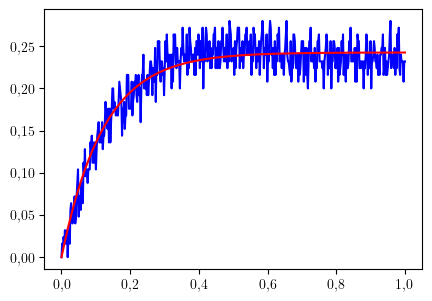

In [9]:
t = np.linspace(0,1,500)

def func(t, a, T):
    return a*(1-np.exp(-t/T))

y = dataCH2[480:980]/10 -3.5
x = t

merenje3 = y

y = np.ndarray.flatten(y) - -0.003999999999999115

popt, pcov = curve_fit(func,t,y)

plt.plot(t, y, 'b', label='arduino merenje')
plt.plot(t, func(t, *popt), 'r', label='model')

In [10]:
print('Km = ', popt[0], '[Hz]')
print('Tm = ', popt[1],'[s]')
print(y[0])

Km =  0.2425889180987146 [Hz]
Tm =  0.12216175943830249 [s]
0.0


<h3> 3.5V +- 1.6</h3>

In [11]:
dataCH2 = pd.read_csv('maliSignalData/3.5DC-1.6AC/CH2csvData').values

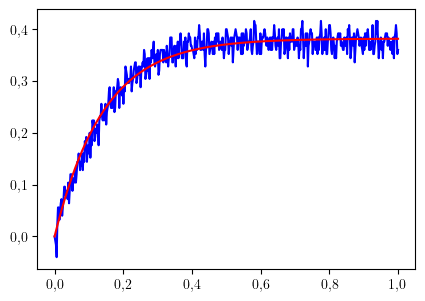

In [12]:
t = np.linspace(0,1,500)

def func(t, a, T):
    return a*(1-np.exp(-t/T))

y = dataCH2[515:1015]/10 -3.5
x = t

merenje4 = y

y = np.ndarray.flatten(y) - -0.003999999999999115

popt, pcov = curve_fit(func,t,y)

plt.plot(t, y, 'b', label='arduino merenje')
plt.plot(t, func(t, *popt), 'r', label='model')

In [13]:
print('Km = ', popt[0], '[Hz]')
print('Tm = ', popt[1],'[s]')
print(y[0])

Km =  0.3818520240706676 [Hz]
Tm =  0.14144279796865558 [s]
0.0


Ovo mu gore dodje merenje H(s) iliti od ulaza motora do izlaza sistema

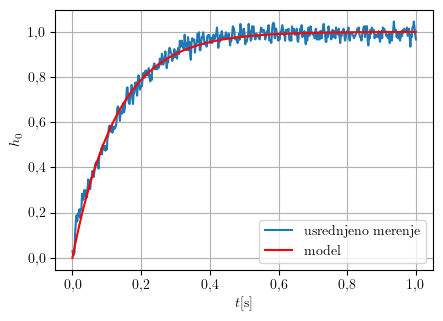

In [18]:
avg = np.zeros(len(merenje1))
for i in range(len(merenje1)):
    avg[i] = (merenje1[i] + merenje2[i] + merenje3[i] + merenje4[i])/4

avg = avg/0.37760195

popt, pcov = curve_fit(func,t,avg)

plt.plot(t, avg, label='usrednjeno merenje')
plt.plot(t, func(t, *popt), 'r', label='model')
plt.xlabel('$t$[s]')
plt.ylabel('$h_{0}$')
plt.grid()
plt.legend()
plt.savefig('fig_pi/Hsrednje.pdf', format='pdf', bbox_inches='tight')

In [15]:
print('Km = ', popt[0], '[Hz]')
print('Tm = ', popt[1],'[s]')

Km =  1.0004380244948345 [Hz]
Tm =  0.12930620720951544 [s]


In [16]:
print(func(t, *popt))

[0.         0.01538542 0.03053422 0.04545006 0.06013652 0.07459711
 0.08883532 0.10285457 0.11665822 0.13024958 0.14363193 0.15680848
 0.16978239 0.18255677 0.19513471 0.20751921 0.21971325 0.23171977
 0.24354164 0.25518171 0.26664277 0.27792757 0.28903883 0.29997921
 0.31075134 0.32135781 0.33180116 0.34208392 0.35220853 0.36217745
 0.37199305 0.38165771 0.39117373 0.40054341 0.409769   0.41885271
 0.42779672 0.43660319 0.44527422 0.45381191 0.4622183  0.47049541
 0.47864522 0.48666971 0.49457079 0.50235036 0.51001029 0.51755242
 0.52497856 0.5322905  0.53948999 0.54657876 0.55355852 0.56043094
 0.56719766 0.57386033 0.58042053 0.58687984 0.59323982 0.59950199
 0.60566786 0.6117389  0.61771658 0.62360233 0.62939757 0.63510368
 0.64072204 0.646254   0.65170088 0.657064   0.66234464 0.66754407
 0.67266354 0.67770427 0.68266749 0.68755438 0.69236612 0.69710386
 0.70176874 0.70636188 0.71088438 0.71533733 0.71972181 0.72403885
 0.72828951 0.73247479 0.73659571 0.74065326 0.7446484  0.7485